In [1]:
from matplotlib import cm 
from scipy import linalg
from sklearn.preprocessing import MinMaxScaler
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Task 1.1 ##

In [2]:
np.random.seed(11)
n = 50 # количество исптынйий
blocks = np.random.uniform(0.6,1,6) # вероятности безотказной работы элементов A B C D E F, соответсвенно
system_stats = np.linspace(1,1,n) 
table = pd.DataFrame(columns=['Pi(A)','Pi(B)','Pi(C)','Pi(D)','Pi(E)','Pi(F)','A','B','C','D','E','F','result'])

for i in range(n):

    blocks_states = [0,0,0]
    blocks_states_exact = [0,0,0,0,0,0]

    for k,v in enumerate(blocks):

        if k<=1: # A B
            if np.random.rand() < v:
                blocks_states[0] = 1
                blocks_states_exact[k] = 1
        if k >= 2 and k <= 4: # CDE
            if np.random.rand() < v: 
                blocks_states[1] = 1
                blocks_states_exact[k] = 1
        if k==5: # F
            if np.random.rand() < v: 
                blocks_states[2] = 1
                blocks_states_exact[k] = 1

    if 0 in blocks_states: system_stats[i] = 0

    table.loc[len(table.index)] = [*blocks, *blocks_states_exact, system_stats[i]]# concat lists and add to pd.df
print(collections.Counter(system_stats))
relative_err = collections.Counter(system_stats)[1] / n # обращение по ключу {0.0 - Counter; 1.0 - Counter}
print('Относительная частота: ', relative_err)

blocks_prob = [1-(1-blocks[0])*(1-blocks[1]), 1-(1-blocks[2])*(1-blocks[3])*(1-blocks[4]), blocks[5]] # [P(1),P(2),P(3)]
exact_err = np.prod(blocks_prob) # P(1)*P(2)*P(3)
print(blocks_prob)
print('Точная погрешность: ', exact_err)
print('Абсолютная погрешность: ', abs(relative_err - exact_err))

display(table)
36/50

Counter({1.0: 36, 0.0: 14})
Относительная частота:  0.72
[0.8713974615424991, 0.9945211422227018, 0.794170839267113]
Точная погрешность:  0.6882468731060112
Абсолютная погрешность:  0.03175312689398879


Pi(A)    Pi(B)     Pi(C)     Pi(D)     Pi(E)     Pi(F)    A    B    C  \
0   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
1   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  0.0  1.0   
2   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
3   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
4   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
5   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
6   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
7   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
8   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
9   0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  0.0  1.0   
10  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
11  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
12  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
13  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
14  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
15  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
16  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
17  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  0.0   
18  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
19  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
20  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
21  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
22  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
23  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
24  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  0.0  1.0   
25  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
26  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
27  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
28  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  0.0  1.0   
29  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
30  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
31  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
32  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
33  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
34  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
35  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
36  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
37  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
38  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  0.0   
39  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
40  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
41  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
42  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  0.0   
43  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
44  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
45  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  0.0  1.0  1.0   
46  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
47  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  1.0  1.0   
48  0.672108  0.60779  0.785287  0.889974  0.768081  0.794171  1.0  0.0  1.0   
49  0.6

0.72

## Task 1.2 ##

In [3]:
np.random.seed(11)
hours = 60
n = 50
lambdas = np.random.uniform(0.01, 0.1, 5) # Вероятности безотказной работы элементов A B C D E 

system_stats = np.zeros(n)
system_stats_vals = []

table = pd.DataFrame(columns=['Pi(A)','Pi(B)','Pi(C)','Pi(D)','Pi(E)','A','B','C','D','E','block1','block2','result'])
for i in range(n):
    t = [-(1/i)*np.log(np.random.rand()) for i in lambdas]
    system_stats_vals.append(min(max(t[:3]), max(t[3:])))
    if min(max(t[:3]), max(t[3:])) >= hours:
        system_stats[i] = 1

    table.loc[len(table.index)] = [*lambdas, *t, max(t[:3]), max(t[3:]), min(max(t[:3]), max(t[3:]))]# concat lists and add to pd.df

relative_err = collections.Counter(system_stats)[1]/n
print(collections.Counter(system_stats))
print('Оценка надежности устройства: ', relative_err)

analytical_probs = [np.exp(-i*hours) for i in lambdas]
print(analytical_probs)
blocks_prob = [1-(1-analytical_probs[0])*(1-analytical_probs[1])*(1-analytical_probs[2]), 1-(1-analytical_probs[3])*(1-analytical_probs[4])] # [P(1),P(2)]
print(blocks_prob)
exact_err = np.prod(blocks_prob) # P(1)*P(2)
print(exact_err)
print(f'Вероятность безотказной работы устройства за {hours} часов: {exact_err}')
print('Абсолютная погрешность: ', abs(relative_err - exact_err))

print(f'Среднее время безотказной работы:', sum(system_stats_vals)/n)

display(table)

Counter({0.0: 48, 1.0: 2})
Оценка надежности устройства:  0.04
[0.20732735288471732, 0.4940264088398271, 0.044987075431839066, 0.010947510308730517, 0.05675000895781207]
[0.6169716046140501, 0.06707624795845646]
0.041384140334418784
Вероятность безотказной работы устройства за 60 часов: 0.041384140334418784
Абсолютная погрешность:  0.0013841403344187833
Среднее время безотказной работы: 22.847683230417037


Pi(A)     Pi(B)    Pi(C)     Pi(D)     Pi(E)           A           B  \
0   0.026224  0.011753  0.05169  0.075244  0.047818   27.559437  370.960161   
1   0.026224  0.011753  0.05169  0.075244  0.047818   12.002599  188.792205   
2   0.026224  0.011753  0.05169  0.075244  0.047818   17.477607  330.826649   
3   0.026224  0.011753  0.05169  0.075244  0.047818   10.516227   17.064602   
4   0.026224  0.011753  0.05169  0.075244  0.047818   94.473412   28.815187   
5   0.026224  0.011753  0.05169  0.075244  0.047818   34.781072   14.030683   
6   0.026224  0.011753  0.05169  0.075244  0.047818    1.991994    1.141541   
7   0.026224  0.011753  0.05169  0.075244  0.047818  105.008969   85.844560   
8   0.026224  0.011753  0.05169  0.075244  0.047818   47.168729   20.045853   
9   0.026224  0.011753  0.05169  0.075244  0.047818   18.474430   86.578621   
10  0.026224  0.011753  0.05169  0.075244  0.047818  105.490284  329.797068   
11  0.026224  0.011753  0.05169  0.075244  0.047818   11.757694    5.909440   
12  0.026224  0.011753  0.05169  0.075244  0.047818   10.240319   36.312141   
13  0.026224  0.011753  0.05169  0.075244  0.047818   41.831107   25.821075   
14  0.026224  0.011753  0.05169  0.075244  0.047818   38.362305   65.787539   
15  0.026224  0.011753  0.05169  0.075244  0.047818   30.216089   40.286262   
16  0.026224  0.011753  0.05169  0.075244  0.047818   67.787815   19.640688   
17  0.026224  0.011753  0.05169  0.075244  0.047818   16.541069   30.827668   
18  0.026224  0.011753  0.05169  0.075244  0.047818   31.483410   97.251189   
19  0.026224  0.011753  0.05169  0.075244  0.047818   43.666242  129.607276   
20  0.026224  0.011753  0.05169  0.075244  0.047818   91.226564  102.164344   
21  0.026224  0.011753  0.05169  0.075244  0.047818    1.005807   39.960272   
22  0.026224  0.011753  0.05169  0.075244  0.047818    7.305508   53.428475   
23  0.026224  0.011753  0.05169  0.075244  0.047818   25.008758    6.868324   
24  0.026224  0.011753  0.05169  0.075244  0.047818   16.501915   68.364552   
25  0.026224  0.011753  0.05169  0.075244  0.047818    6.617447  175.549079   
26  0.026224  0.011753  0.05169  0.075244  0.047818   44.210364    6.104727   
27  0.026224  0.011753  0.05169  0.075244  0.047818   19.767040    5.978421   
28  0.026224  0.011753  0.05169  0.075244  0.047818   24.820712   58.051014   
29  0.026224  0.011753  0.05169  0.075244  0.047818    1.713543    2.949345   
30  0.026224  0.011753  0.05169  0.075244  0.047818   11.672575   36.909835   
31  0.026224  0.011753  0.05169  0.075244  0.047818  110.541901   14.179519   
32  0.026224  0.011753  0.05169  0.075244  0.047818    0.782318   22.546726   
33  0.026224  0.011753  0.05169  0.075244  0.047818   39.402503  249.649715   
34  0.026224  0.011753  0.05169  0.075244  0.047818    2.038321   86.791592   
35  0.026224  0.011753  0.05169  0.075244  0.047818   97.092836    4.169734   
36  0.026224  0.011753  0.05169  0.075244  0.047818   63.183468  147.864680   
37  0.026224  0.011753  0.05169  0.075244  0.047818   67.392516  102.700027   
38  0.026224  0.011753  0.05169  0.075244  0.047818    4.906871   96.851286   
39  0.026224  0.011753  0.05169  0.075244  0.047818  103.969369   47.136436   
40  0.026224  0.011753  0.05169  0.075244  0.047818   19.501359    8.714816   
41  0.026224  0.011753  0.05169  0.075244  0.047818   74.802923  128.108648   
42  0.026224  0.011753  0.05169  0.075244  0.047818    3.897665   51.740521   
43  0.026224  0.011753  0.05169  0.075244  0.047818    3.661405  127.435850   
44  0.026224  0.011753  0.05169  0.075244  0.047818   63.779093   83.606035   
45  0.026224  0.011753  0.05169  0.075244  0.047818   33.508501   74.665614   
46  0.026224  0.011753  0.05169  0.075244  0.047818    1.939443   10.586644   
47  0.026224  0.011753  0.05169  0.075244  0.047818    2.460852  102.254317   
48  0.026224  0.011753  0.05169  0.075244  0.047818   52.806903   94.207799   
49  0.026224  0.011753  0.05169  0.075244  0.047818   39.

## Task 2.1 ##

In [4]:
data = pd.read_excel('Data2.xlsx')
data.rename(columns={'Роснефть':'rosneft','Unnamed: 0':'date','Лукойл':'lukoil','Газпром':'gazprom'},inplace=True)
print(data)
date = data['date']
data_t = data.drop(['date'], axis=1)
scaler = MinMaxScaler(feature_range=(1, 2))
names = data_t.columns
d = scaler.fit_transform(data_t)
data_norm = pd.DataFrame(d, columns=names)
data_norm['date'] = date
data_norm

         date  rosneft  lukoil  gazprom
0  2022-07-29   353.00  3877.0   195.26
1  2022-07-28   344.30  3831.0   196.25
2  2022-07-27   348.70  3847.5   196.49
3  2022-07-26   347.00  3825.0   193.95
4  2022-07-25   336.60  3669.0   192.00
5  2022-07-22   340.00  3688.0   192.25
6  2022-07-21   328.20  3539.5   189.59
7  2022-07-20   330.00  3580.0   193.30
8  2022-07-19   320.75  3600.0   189.51
9  2022-07-18   326.00  3645.0   186.70
10 2022-07-15   330.50  3709.0   187.61
11 2022-07-14   315.45  3608.0   184.55
12 2022-07-13   321.00  3645.5   186.00
13 2022-07-12   333.50  3752.0   191.40


rosneft    lukoil   gazprom       date
0   2.000000  2.000000  1.896985 2022-07-29
1   1.768309  1.863704  1.979899 2022-07-28
2   1.885486  1.912593  2.000000 2022-07-27
3   1.840213  1.845926  1.787270 2022-07-26
4   1.563249  1.383704  1.623953 2022-07-25
5   1.653795  1.440000  1.644891 2022-07-22
6   1.339547  1.000000  1.422111 2022-07-21
7   1.387483  1.120000  1.732831 2022-07-20
8   1.141145  1.179259  1.415410 2022-07-19
9   1.280959  1.312593  1.180067 2022-07-18
10  1.400799  1.502222  1.256281 2022-07-15
11  1.000000  1.202963  1.000000 2022-07-14
12  1.147803  1.314074  1.121441 2022-07-13
13  1.480692  1.629630  1.573702 2022-07-12

In [5]:
print(sum((data['lukoil'] - data['lukoil'].mean()) * (data['rosneft'] - data['rosneft'].mean())))
print((len(data) * data['lukoil'].std() * data['rosneft'].std()))
sum( (data['lukoil'] - data['lukoil'].mean()) * (data['rosneft'] - data['rosneft'].mean()) ) / (len(data) * data['lukoil'].std() * data['rosneft'].std())

13887.628571428575
17494.861201347758


0.7938118749040838

$\Large r_{в}= \frac{\sum{n_{xy}xy - n \overline{x}\overline{y}}}{n \overline{\sigma_{x}} \overline{\sigma_{y}}} =\frac{13887.628571428575}{17494.861201347758}=0.7938118749040838$

Выборочное корреляционное отношение и модели регрессии:

In [6]:
x_mean = (sum(data['lukoil']) + sum(data['rosneft']))/(len(data)*2)
total_variance = (sum((data['lukoil'] - x_mean)**2) + sum((data['rosneft'] - x_mean)**2))/(len(data)*2)
group_variance = (len(data)*(data['lukoil'].mean()-x_mean)**2 + len(data)*(data['rosneft'].mean()-x_mean)**2)/(len(data)*2)
correlation_ratio = np.sqrt(group_variance/total_variance)
correlation_ratio

0.9990182442187036

Функциональная зависимость?

In [7]:
data = data_norm

### Линейная регрессия ###

In [8]:
A = [[np.sum(data['lukoil']**2),np.sum(data['lukoil'])],
     [np.sum(data['lukoil']),len(data)]]
B = [
    [np.sum(data['rosneft']*data['lukoil'])],
    [np.sum(data['rosneft'])]
    ]
a,b = linalg.solve(A, B)
linear_regr = lambda x: a*x + b
a,b

(array([0.80863678]), array([0.29609346]))

### Квадратичная регрессия ###

In [9]:
A = [[np.sum(data['lukoil']**4),np.sum(data['lukoil']**3),np.sum(data['lukoil']**2)],
     [np.sum(data['lukoil']**3),np.sum(data['lukoil']**2),np.sum(data['lukoil'])],
     [np.sum(data['lukoil']**2),np.sum(data["lukoil"]),len(data)]]
B = [
    [np.sum(data['rosneft']*data['lukoil']**2)],
    [np.sum(data['rosneft']*data['lukoil'])],
    [np.sum(data['rosneft'])]
    ]
a1,b1,c1 = linalg.solve(A, B)
quadr_regr = lambda x: a1*x**2+b1*x+c1
a1,b1,c1

(array([0.77199251]), array([-1.54241502]), array([2.00988748]))

### Экспоненциальная регрессия ###

In [10]:
A = [[np.sum(np.exp(2*data_norm['lukoil'])),np.sum(np.exp(data_norm['lukoil']))],
     [np.sum(np.exp(data_norm['lukoil'])),len(data_norm)]]
B = [
    [np.sum(data_norm['rosneft']*np.exp(data_norm['lukoil']))],
    [np.sum(data_norm['rosneft'])]
    ]
a2,b2 = linalg.solve(A, B)
exp_regr = lambda x: a2*np.exp(x) + b2
a2,b2

(array([0.17398181]), array([0.68995804]))

### Логарифмическая регрессия ###

In [11]:
A = [[np.sum(np.log(data['lukoil'])**2),np.sum(np.log(data['lukoil']))],
     [np.sum(np.log(data['lukoil'])),len(data)]]
B = [
    [np.sum(data['rosneft']*np.log(data['lukoil']))],
    [np.sum(data['rosneft'])]
    ]
a3,b3 = linalg.solve(A, B)
ln_regr = lambda x: a3*np.log(x) + b3
a3,b3

(array([1.16006226]), array([1.0637115]))

### Графики ###

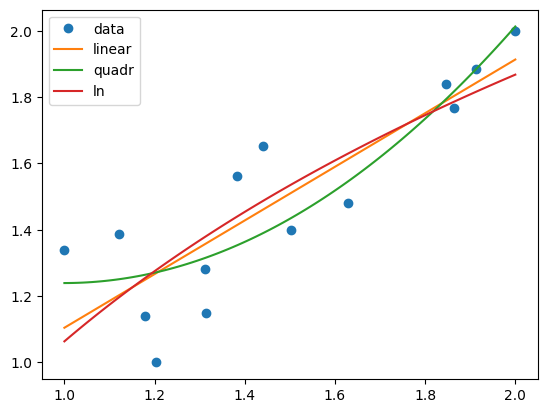

In [12]:
##xx = np.linspace(3500,4000,100)
xx = np.linspace(1,2,100)
plt.plot(data['lukoil'],data['rosneft'],'o')
plt.plot(xx,linear_regr(xx))
plt.plot(xx,quadr_regr(xx))
plt.plot(xx,ln_regr(xx))
plt.legend(['data','linear','quadr', 'ln'])
plt.show()

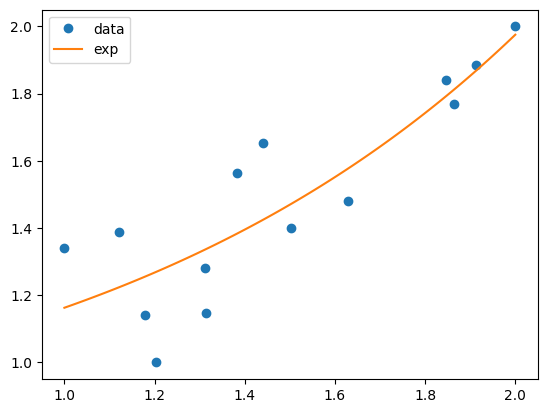

In [13]:
xx = np.linspace(1,2,100)
plt.plot(data_norm['lukoil'],data_norm['rosneft'],'o')
plt.plot(xx,exp_regr(xx))
plt.legend(['data','exp'])
plt.show()

### Выбор лучшего приближения ###

In [14]:
w_linear = np.sum((data['rosneft'] - linear_regr(data['lukoil']))**2)
print(w_linear)
w_square = np.sum((data['rosneft'] - quadr_regr(data['lukoil']))**2)
print(w_square)
w_ln = np.sum((data['rosneft'] - ln_regr(data['lukoil']))**2)
print(w_ln)
w_exp = np.sum((data_norm['rosneft'] - exp_regr(data_norm['lukoil']))**2)
print(w_exp)
np.argmin([w_linear,w_square,w_ln,w_exp]), min(w_linear,w_square,w_ln,w_exp)

0.3264014302593439
0.2711206605178816
0.377665820111359
0.2871647114706649


(1, 0.2711206605178816)

## Task 2.2 ##

In [15]:
data

rosneft    lukoil   gazprom       date
0   2.000000  2.000000  1.896985 2022-07-29
1   1.768309  1.863704  1.979899 2022-07-28
2   1.885486  1.912593  2.000000 2022-07-27
3   1.840213  1.845926  1.787270 2022-07-26
4   1.563249  1.383704  1.623953 2022-07-25
5   1.653795  1.440000  1.644891 2022-07-22
6   1.339547  1.000000  1.422111 2022-07-21
7   1.387483  1.120000  1.732831 2022-07-20
8   1.141145  1.179259  1.415410 2022-07-19
9   1.280959  1.312593  1.180067 2022-07-18
10  1.400799  1.502222  1.256281 2022-07-15
11  1.000000  1.202963  1.000000 2022-07-14
12  1.147803  1.314074  1.121441 2022-07-13
13  1.480692  1.629630  1.573702 2022-07-12

### Многомерная регрессия ###
X_1 - rosneft
X_2 - lukoil
X_3 - gazprom

In [16]:
A = [[np.sum(data['lukoil']**2),np.sum(data['gazprom']*data['lukoil']),np.sum(data['lukoil'])],
     [np.sum(data['lukoil']*data['gazprom']),np.sum(data['gazprom']**2),np.sum(data['gazprom'])],
     [np.sum(data['lukoil']),np.sum(data['gazprom']),len(data)]]
B = [
    [np.sum(data['rosneft']*data['lukoil'])],
    [np.sum(data['rosneft']*data['gazprom'])],
    [np.sum(data['rosneft'])]
    ]
a_3d,b_3d,c_3d = linalg.solve(A, B)
regr_3d = lambda x1,x2: a_3d*x1 + b_3d*x2 + c_3d
a_3d,b_3d,c_3d

(array([0.43068781]), array([0.5481574]), array([0.00800525]))

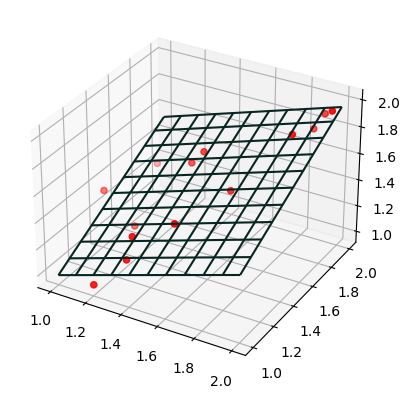

In [17]:
fig = plt.figure()

x2 = np.linspace(1,2,100)
x3 = np.linspace(1,2,100)

X, Y = np.meshgrid(x2, x3) 
Z = regr_3d(X, Y)
 
ax = plt.axes(projection ='3d') 
ax.plot_wireframe(X, Y, Z,color = '#072622',rstride=10, cstride=10)
ax.scatter(data['lukoil'],data['gazprom'],data['rosneft'],color ='#fa0202')
plt.show()

### Теснота линейной связи ###

#### Частный выборочный коэф-нт (Y - const/ gazprom - const ) ####

In [18]:
r_xz = sum((data['lukoil'] - data['lukoil'].mean()) * (data['rosneft'] - data['rosneft'].mean()) ) / (len(data) * data['lukoil'].std() * data['rosneft'].std())
r_xy = sum((data['lukoil'] - data['lukoil'].mean()) * (data['gazprom'] - data['gazprom'].mean()) ) / (len(data) * data['lukoil'].std() * data['gazprom'].std())
r_yz = sum((data['gazprom'] - data['gazprom'].mean()) * (data['rosneft'] - data['rosneft'].mean()) ) / (len(data) * data['gazprom'].std() * data['rosneft'].std())
r_xz_y =  (r_xz -r_xy*r_yz)/(np.sqrt((1-r_xy**2)*(1-r_xz**2)))
r_xz_y

0.5623365681443191

#### Частный выборочный коэф-нт (X - const/ lukoil - const ) ####

In [19]:
r_yz_x =  (r_yz -r_xy*r_xz)/(np.sqrt((1-r_xy**2)*(1-r_xz**2)))
r_yz_x

0.6882581097575844

#### Теснота связи ####

In [20]:
R = np.sqrt((r_xz**2 - 2*r_xy*r_xz*r_yz + r_yz**2)/(1-r_xy**2))
R

0.8974079177075108

## Task 3 ##

In [21]:
N = 3
data2 = -np.sort(-np.array([99, 91, 93-N, 74, 78, 65, 64, 66, 52, 53, 48+N, 62]))
data2_temp_dict = {v:k for k,v in zip(np.arange(1,13),data2)}

data2 = np.array([99, 91, 93-N, 74, 78, 65, 64, 66, 52, 53, 48+N, 62])
data2_dict = {x: data2_temp_dict[x] for x in data2}
# for x in data2:
#     data2_dict[x] = data2_temp_dict[x]

data1_dict = {v:k for k,v in zip(np.arange(1,13),[98, 94, 88, 80, 76, 70, 63, 61, 60, 58, 56, 51])}
print(data2_dict.values())
data1_dict,data2_dict

dict_values([1, 2, 3, 5, 4, 7, 8, 6, 11, 10, 12, 9])


({98: 1,
  94: 2,
  88: 3,
  80: 4,
  76: 5,
  70: 6,
  63: 7,
  61: 8,
  60: 9,
  58: 10,
  56: 11,
  51: 12},
 {99: 1,
  91: 2,
  90: 3,
  74: 5,
  78: 4,
  65: 7,
  64: 8,
  66: 6,
  52: 11,
  53: 10,
  51: 12,
  62: 9})

### Корреляция Спирмена ###

In [22]:
t_s = 2.23 #по таблице при уровне значимости 0.05 (ПРОВЕРИТЬ!!!)
print((np.array(list(data1_dict.values())) - np.array(list(data2_dict.values())))**2)
spearman_correl = 1 - 6*np.sum((np.array(list(data1_dict.values())) - np.array(list(data2_dict.values())))**2)/(list(data1_dict.values())[-1]**3 - list(data1_dict.values())[-1])
#list(data1_dict.values())[-1],spearman_correl
T_critical = t_s * np.sqrt((1-spearman_correl**2)/(len(list(data1_dict.values())) - 2))
spearman_correl,T_critical

[0 0 0 1 1 1 1 4 4 0 1 9]


(0.9230769230769231, 0.27122612239136473)

spearman_correl > T_critical ---> H_0 не принимается

### Корреляция Кендалла ###

In [23]:
z = 1.96 # по таблице при уровне значимости 0.05
numbers = list(data2_dict.values())
R = np.zeros(len(numbers))
for index,value in enumerate(numbers):
    count = 0
    for i in range(index+1,len(numbers)):
        if numbers[i] > value:
            count+=1
    R[index] = count
print(R)
print(np.sum(R))
kendall_correl = (4*np.sum(R))/(len(numbers)*(len(numbers)-1)) - 1
T_critical = z*np.sqrt((2*(2*len(numbers)+5))/(9*len(numbers)*(len(numbers)-1)))
kendall_correl, T_critical

[11. 10.  9.  7.  7.  5.  4.  4.  1.  1.  0.  0.]
59.0


(0.7878787878787878, 0.43307373731601634)

kendall_correl > T_critical ---> H_0 не принимается

## Task 4.1 ##

In [24]:
np.random.seed(1)
data = pd.DataFrame()
rnd = np.random.randint
#data['N'] = np.arange(1,9)
data['F1'] = np.array([100,101,126,rnd(110,130),133,141,147,148])
data['F2'] =  np.array([92,102,104,115,119,122,rnd(110,130),146])
data['F3'] =  np.array([74,87,88,93,94,101,102,105])
data['F4'] =  np.array([68,80,83,87,96,97,106,rnd(110,130)])
data['F5'] =  np.array([64,83,83,84,90,96,101,rnd(110,130)])
data['F6'] =  np.array([69,71,80,80,81,82,86,99])

matrix = data.to_numpy()
num_rows = [len(x)  for x in matrix.transpose()]
num_rows = num_rows - np.array(data.isna().sum())   
x_group = np.nansum(matrix,axis=0)/num_rows
x_total = np.nansum(matrix)/np.sum(num_rows)
x_group, matrix

(array([126.375, 115.125,  93.   ,  92.375,  89.875,  81.   ]),
 array([[100,  92,  74,  68,  64,  69],
        [101, 102,  87,  80,  83,  71],
        [126, 104,  88,  83,  83,  80],
        [115, 115,  93,  87,  84,  80],
        [133, 119,  94,  96,  90,  81],
        [141, 122, 101,  97,  96,  82],
        [147, 121, 102, 106, 101,  86],
        [148, 146, 105, 122, 118,  99]]))

y_ij = x_ij - X_total

In [25]:
matrix = matrix - x_total
matrix

array([[  0.375,  -7.625, -25.625, -31.625, -35.625, -30.625],
       [  1.375,   2.375, -12.625, -19.625, -16.625, -28.625],
       [ 26.375,   4.375, -11.625, -16.625, -16.625, -19.625],
       [ 15.375,  15.375,  -6.625, -12.625, -15.625, -19.625],
       [ 33.375,  19.375,  -5.625,  -3.625,  -9.625, -18.625],
       [ 41.375,  22.375,   1.375,  -2.625,  -3.625, -17.625],
       [ 47.375,  21.375,   2.375,   6.375,   1.375, -13.625],
       [ 48.375,  46.375,   5.375,  22.375,  18.375,  -0.625]])

In [26]:
Q = np.nansum(matrix**2,axis=0)
#Q, np.sum(matrix[:,0]**2) ,matrix[:,0] ,  matrix[:,0]**2
T = np.nansum(matrix,axis=0)
Q,T

(array([8344.375, 3802.875, 1063.125, 2382.375, 2511.375, 3371.125]),
 array([ 214.,  124.,  -53.,  -58.,  -78., -149.]))

In [27]:
S_total = np.sum(Q) - (np.sum(T)**2)/(np.sum(num_rows))
print(S_total)
S_factor = np.sum(T**2/num_rows) - (np.sum(T))/(np.sum(num_rows))
print(S_factor)
S_residual = S_total - S_factor
S_factor_2 = S_factor/(matrix.shape[-1] - 1)
S_residual_2 = S_residual/(np.sum(num_rows) - matrix.shape[-1])
F_spectator =  S_factor_2/S_residual_2
S_residual,S_factor_2,S_residual_2,F_spectator

21475.25
11953.75


(9521.5, 2390.75, 226.70238095238096, 10.545764847975633)

## Task 4.2 ##

In [28]:
np.random.seed(1)
data = pd.DataFrame()
rnd = np.random.randint
#data['N'] = np.arange(1,9)
data['F1'] = np.array([37,47,40,rnd(50,70),np.nan,np.nan])
data['F2'] =  np.array([rnd(50,70),86,67,92,95,98])
data['F3'] =  np.array([rnd(50,70),100,98,np.nan,np.nan,np.nan])

matrix = data.to_numpy()
num_rows = [len(x)  for x in matrix.transpose()]
num_rows = num_rows - np.array(data.isna().sum())
x_group = np.nansum(matrix,axis=0)/num_rows
x_total = np.nansum(matrix)/np.sum(num_rows)
x_group, matrix,x_total

(array([44.75      , 83.16666667, 86.66666667]),
 array([[ 37.,  61.,  62.],
        [ 47.,  86., 100.],
        [ 40.,  67.,  98.],
        [ 55.,  92.,  nan],
        [ nan,  95.,  nan],
        [ nan,  98.,  nan]]),
 72.15384615384616)

y_ij = x_ij - X_total

In [29]:
matrix = matrix - x_total
matrix

array([[-35.15384615, -11.15384615, -10.15384615],
       [-25.15384615,  13.84615385,  27.84615385],
       [-32.15384615,  -5.15384615,  25.84615385],
       [-17.15384615,  19.84615385,          nan],
       [         nan,  22.84615385,          nan],
       [         nan,  25.84615385,          nan]])

In [30]:
Q = np.nansum(matrix**2,axis=0)
#Q, np.sum(matrix[:,0]**2) ,matrix[:,0] ,  matrix[:,0]**2
T = np.nansum(matrix,axis=0)
Q,T

(array([3196.63313609, 1926.52662722, 1546.53254438]),
 array([-109.61538462,   66.07692308,   43.53846154]))

In [31]:
S_total = np.sum(Q) - (np.sum(T)**2)/(np.sum(num_rows))
print(S_total)
S_factor = np.sum(T**2/num_rows) - (np.sum(T))/(np.sum(num_rows))
print(S_factor)
S_residual = S_total - S_factor
S_factor_2 = S_factor/(matrix.shape[-1])
S_residual_2 = S_residual/(np.sum(num_rows) - matrix.shape[-1])
F_spectator =  S_factor_2/S_residual_2
S_residual,S_factor_2,S_residual_2,F_spectator

6669.692307692308
4363.442307692308


(2306.25, 1454.4807692307693, 230.625, 6.306691682301438)

## Task 5 ###

In [32]:
N = 3
x = np.array([24+N, 25, 27, 27, 30, 32, 33, 34, 35, 36])
y = np.array([21, 21, 22, 23, 25, 25, 25, 25, 27, 27, 29, 31-N])

In [33]:
class dict_task5:
    def __init__(self, name, value, index):
        self.name = name
        self.value =  value
        self._index  = index
    def __repr__( self ) :
        return self.name + ":\tvalue:" +  str(self.value) + "  index:" + str(self._index) + "\n"
    # getter function
    @property
    def index(self):
        return self._index
    # setter function
    @index.setter
    def index(self, i):
        self._index = i

In [34]:
data_x = np.array([dict_task5("x",value,index) for index,value in enumerate(x)])
data_y = np.array([dict_task5("y",value,index) for index,value in enumerate(y)])
print(len(y))
data = np.hstack([data_y,data_x]) # для приоритет при сортировке дается втором элементу ( в данном случае х)
temp = 0
#print(*data)
data =  sorted(data, key=lambda x: x.value)
#print(*data)
for i,obj in enumerate(data):
    obj.index = i + 1
    print(obj.value,end=' ')
    if obj.name == "x":
        temp += obj.index
print(*data, temp)
print('верхняя крит = ', (len(x)+len(y)+1)*len(x))

12
21 21 22 23 25 25 25 25 25 27 27 27 27 27 28 29 30 32 33 34 35 36 y:	value:21  index:1
 y:	value:21  index:2
 y:	value:22  index:3
 y:	value:23  index:4
 y:	value:25  index:5
 y:	value:25  index:6
 y:	value:25  index:7
 y:	value:25  index:8
 x:	value:25  index:9
 y:	value:27  index:10
 y:	value:27  index:11
 x:	value:27  index:12
 x:	value:27  index:13
 x:	value:27  index:14
 y:	value:28  index:15
 y:	value:29  index:16
 x:	value:30  index:17
 x:	value:32  index:18
 x:	value:33  index:19
 x:	value:34  index:20
 x:	value:35  index:21
 x:	value:36  index:22
 165
верхняя крит =  230
